## Exercise 4. Read and analyse an XML file from a GPS
The file *activity_779202142.gpx* in the "data" directory is downloaded from a GPS watch used to record a run (a marathon in this case). The file is in XML format. XML stands for "eXtendible Markup Language" and is a standard format used to pass information from different programs and on the internet. You can read more about XML for instance on the Wikipedia: https://en.wikipedia.org/wiki/XML

Python has methods to navigate through an XML file and capture the information contained in it. The skeleton program below contains all the basics needed to open the file and access the information about the "track" corresponding to the run. 

You should use *longitude* and *latitute* to convert the information into a 2D positions in metres, with (0,0) being the starting point. The *time* information, given in UTC, can be converted into seconds, with t=0s being the time of the first point. The elevation is given in metres. 

You should look at the xml file (open it with an editor) to see how it is structured and understand how the piece of code provided below reads it and unpacks the information into an array of dictionaries. 

The dictionaries can then put into numpy arrays to be used for your data analysis. This is not the most efficient way of doing this, as one could put the information straight into arrays. Doing this way, however, it is much easier to extract informatio of a specific entry (as shown below). 

This operation of reading a file in a specific format, clean up the records, and eventually prepare everything in a format that can be easily analysed is often referred to as "data wrangling".

Once you have x, y, h and t (position, elevation, time) plot:
- The route taken by the runner in the (x,y) plane in km
- The distance run as a function of time (in minutes), with t=0 being the start of the run
- The speed of the runner (in m/s) as a function of time (in min)
- The speed of the runner (in m/s) as a function of the distance ran (in km)
- The elevation (in m) as a function of the distance run (in km)
- What was the time taken to run the "white peak" marathon?

** Total [10 marks] ** 

I read  3260  elements


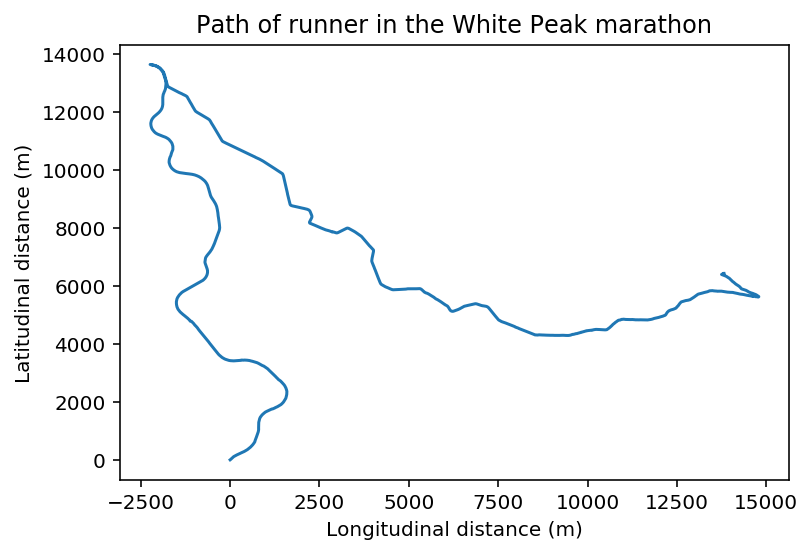

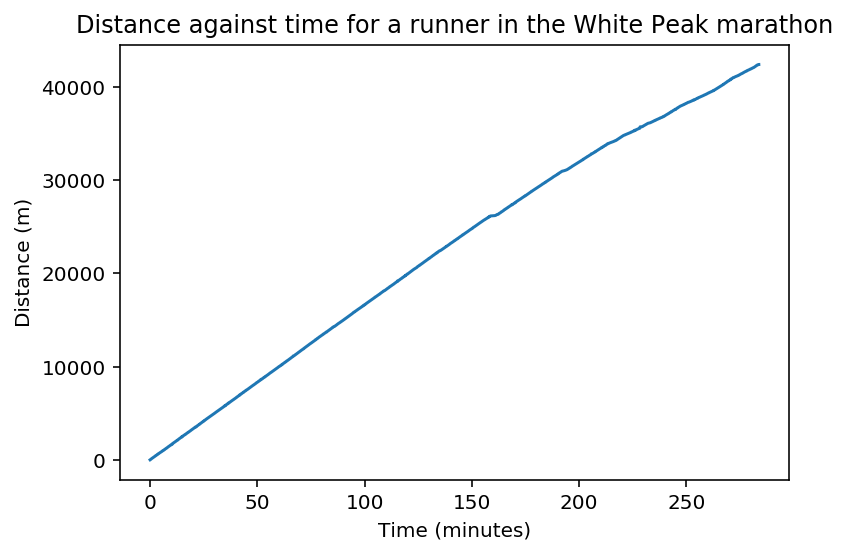

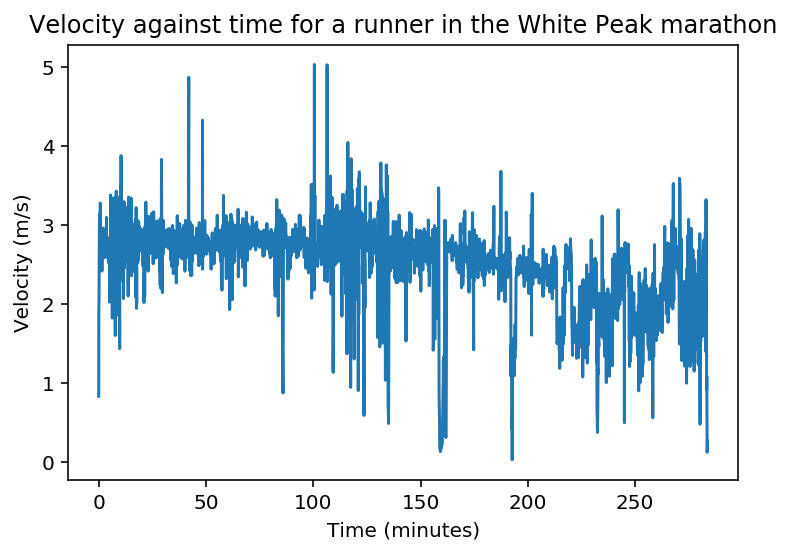

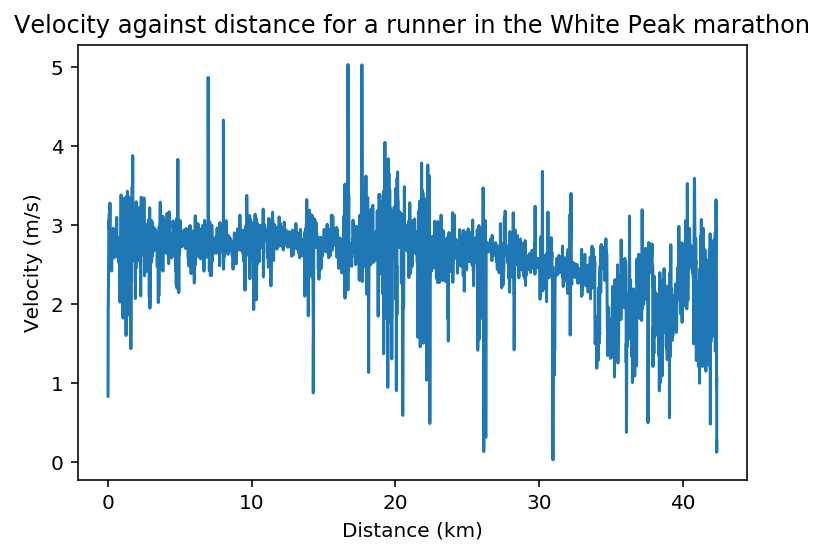

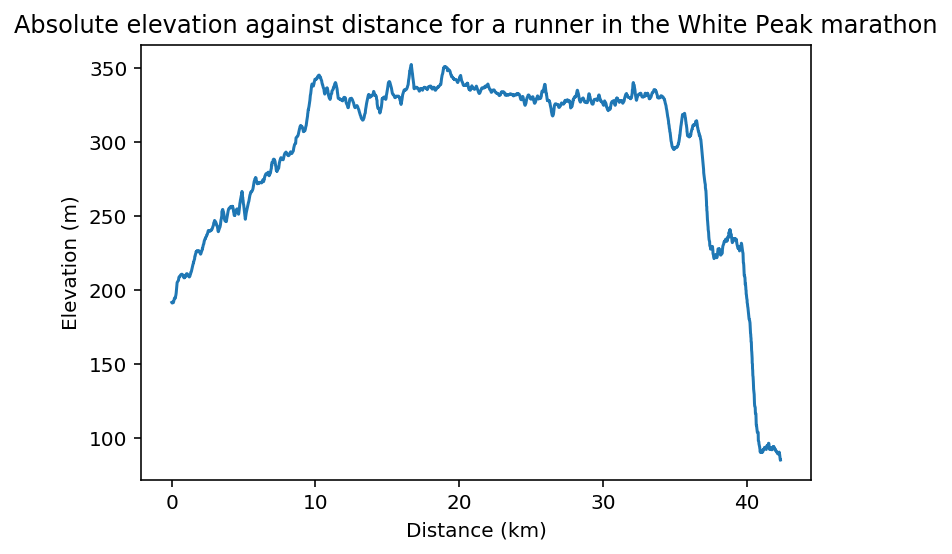

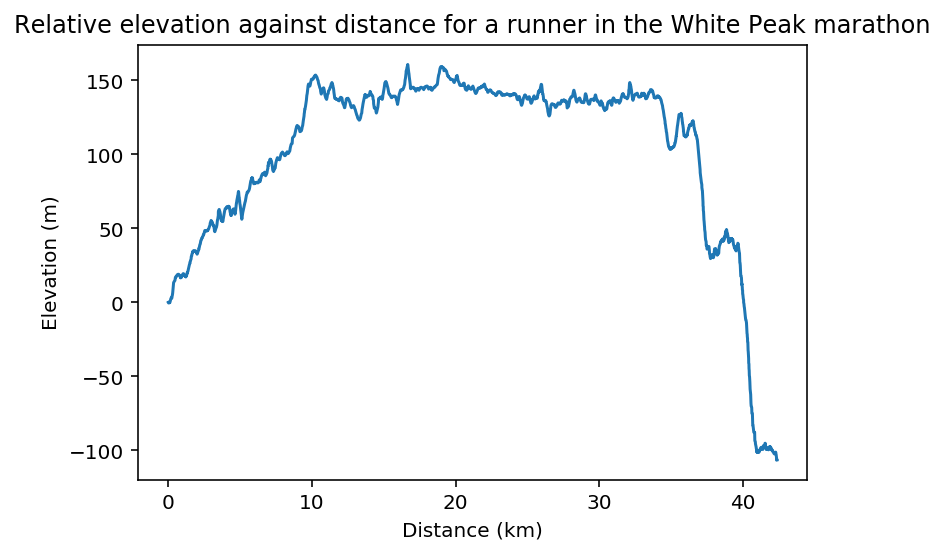

Time taken to run the White Peak marathon in seconds: 17030.0


In [5]:
#Given function for xml imports_list
import glob
import xml.etree.ElementTree as ET
import numpy as np
import dateutil.parser as dtp
import math
import matplotlib.pyplot as plt

# Function parseXML
# Input: xml_file
# Output array of elements with coordinates lat, lon, ele, time. 
def parseXML(xml_file):
    tree = ET.ElementTree(file=xml_file)
    root = tree.getroot()
    
    xml=[]
    for child in root[1]:
        if child.tag == "{http://www.topografix.com/GPX/1/1}trkseg":
            for step_child in child:
                evt={} # declare a new dictionary
                evt['lat'] = step_child.get('lat')
                evt['lon'] = step_child.get('lon')
                evt['ele'] = step_child[0].text
                evt['time'] = step_child[1].text
                
                xml.append(evt)
    return xml

# Path may need adjusting, depending on folder configuration
xml_file = glob.glob('../data/activity_779202142.gpx')
xml = parseXML(xml_file[0])

# Print out the size of the array
print("I read ",len(xml)," elements")

#Create empty lists for different values
latlist=[]*len(xml)
longlist=[]*len(xml)
elelist=[]*len(xml)
elelist2=[]*len(xml)
timelist=[]*len(xml)


#list already in order of time so no need to sort
#take latitude, longitude and elevation in relation to starting point (0,0)
#append lists with ith value minus first value

for i in range(len(xml)):
    x0 = float(xml[0]["lat"])
    xnew = float(xml[i]["lat"])-x0
    latlist.append(xnew)
    
    y0 = float(xml[0]["lon"])
    ynew = float(xml[i]["lon"])-y0
    longlist.append(ynew)
    
    e= float(xml[i]["ele"])
    elelist2.append(e)
    
    h0=float(xml[0]["ele"])
    hnew=float(xml[i]["ele"])-h0
    elelist.append(hnew)
    
#turn lists into arrays for plotting purposes
yarray = np.array(latlist)
xarray = np.array(longlist)
elearray = np.array(elelist)
eleabsolute = np.array(elelist2)


#coordinates in latitude and longitude (in degrees) need to be converted to x and y coordinates
#depends on position on Earth


#radius of the Earth
r = 6371000

x1 = np.radians(x0)
#y coordinates use latitude as angle of circle arc
y = r*np.radians(yarray)
#x coordinates have a correction based on original latitude x1
x = r*np.radians(xarray)*np.cos(x1)

#plot x,y
plt.plot(x,y)
plt.xlabel ('Longitudinal distance (m)')
plt.ylabel('Latitudinal distance (m)')
plt.title('Path of runner in the White Peak marathon')
plt.show()

#append list with times relative to first time
for i in range(len(xml)):
    t0 = (dtp.parse(xml[0]["time"]))
    tnew = (dtp.parse(xml[i]["time"]))
    dt=(tnew-t0).total_seconds()
    timelist.append(dt)

#turn list into array
timearray = np.array(timelist)

#turn seconds into minutes
minutes=timearray/60

#to calculate total distance create vectors for x and y with the difference between adjacent points and take modulus
dx = x[1:]-x[:-1]
dy = y[1:]-y[:-1]
dr = (dx**2+dy**2)**(1/2)

#add elements of a vector and keep a cumulative sum
D = dr.cumsum()

#plot time against distance
#[:-1] to get correct array size
plt.plot(minutes[:-1],D)
plt.xlabel ('Time (minutes)')
plt.ylabel('Distance (m)')
plt.title('Distance against time for a runner in the White Peak marathon')
plt.show()

#create vector with difference in time values
dt = timearray[1:]-timearray[:-1]

#define velocity as distance/time
v = dr/dt

#plot velocity against time
plt.plot(minutes[:-1],v)
plt.xlabel ('Time (minutes)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity against time for a runner in the White Peak marathon')
plt.show()

#plot velocity against distance (in km)
plt.plot(D/1000,v)
plt.xlabel ('Distance (km)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity against distance for a runner in the White Peak marathon')
plt.show()

#plot elevation against distance

#plot elevation against distance for 
plt.plot(D/1000,eleabsolute[:-1])
plt.xlabel ('Distance (km)')
plt.ylabel('Elevation (m)')
plt.title('Absolute elevation against distance for a runner in the White Peak marathon')
plt.show()

plt.plot(D/1000,elearray[:-1])
plt.xlabel ('Distance (km)')
plt.ylabel('Elevation (m)')
plt.title('Relative elevation against distance for a runner in the White Peak marathon')
plt.show()

#for total time take difference between first and last element
t0=(dtp.parse(xml[0]["time"]))
tfinal=(dtp.parse(xml[len(xml)-1]["time"]))
print("Time taken to run the White Peak marathon in seconds:",(tfinal-t0).total_seconds())

In [0]:
# Example of a printout of a specific record
print("coordinates of point 55")
print(xml[55])

# Example on how to get the Delta t between two points:
import dateutil.parser as dtp
t0=(dtp.parse(xml[0]['time']) )
t55=(dtp.parse(xml[55]['time']) )
print("Delta time is:",(t55-t0).total_seconds() )

# Example of how to calculate a vector with the difference between adjacent elemets
# deltaA=A[1:]-A[:-1] # Note the length of the vector will be n-1

#Example of how to add elements of a vector and keep a cumulative sum
# Asum=A.cumsum()


coordinates of point 55
{'lat': '53.05431014858186244964599609375', 'lon': '-1.74467478878796100616455078125', 'ele': '208.600006103515625', 'time': '2015-05-16T10:14:33.000Z'}
Delta time is: 303.0
